In [1]:
# For loading JSON Results
import pandas as pd
# Seaborn style
import seaborn as sn
# For graphing/plotting
import matplotlib.pyplot as plt
import matplotlib as mpl

# system operations
import os

import numpy as np

from PIL import Image

import seaborn as sns

import matplotlib.patches as mpatches

In [2]:
# Loading data
labels = os.listdir("../data/raw/data/train")
loaded_data = pd.read_json('../results/evaluation.json')
train, val, test = loaded_data['train'], loaded_data['val'], loaded_data['test']
print(train, val, test)

accuracy                                                     0.902363
confusion_matrix    [[81, 0, 0, 0, 11, 2, 2, 0, 2, 0, 1, 1, 0, 2, ...
f1_score            [0.83076923076923, 0.635294117647058, 0.903846...
loss                                                         0.595024
precision_score     [0.8709677419354831, 0.83076923076923, 0.87850...
recall_score        [0.794117647058823, 0.514285714285714, 0.93069...
Name: train, dtype: object accuracy                                                     0.902363
confusion_matrix    [[81, 0, 0, 0, 11, 2, 2, 0, 2, 0, 1, 1, 0, 2, ...
f1_score            [0.83076923076923, 0.635294117647058, 0.903846...
loss                                                         0.595024
precision_score     [0.8709677419354831, 0.83076923076923, 0.87850...
recall_score        [0.794117647058823, 0.514285714285714, 0.93069...
Name: val, dtype: object accuracy                                                     0.902363
confusion_matrix    [[81, 0, 0, 0, 11,

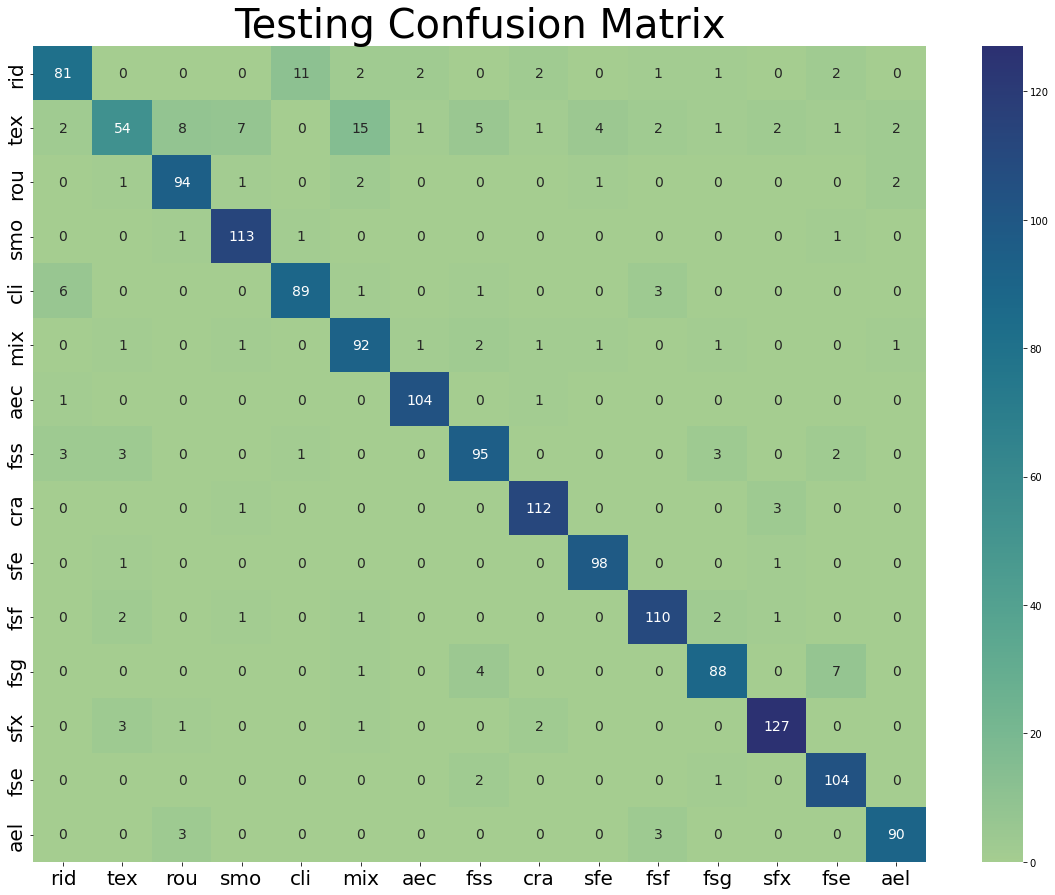

In [61]:
# ----------------------- Plotting Confusion Matrix
df_cm = pd.DataFrame(test['confusion_matrix'], labels, labels)
plt.figure(figsize = (20,15))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Testing Confusion Matrix", fontdict={'fontsize':40})
map1 = sn.heatmap(df_cm, annot=True, annot_kws={"size": 14}, fmt='g', cmap=sns.color_palette("crest", as_cmap=True))
plt.savefig("../results/test_confusion_matrix.png")

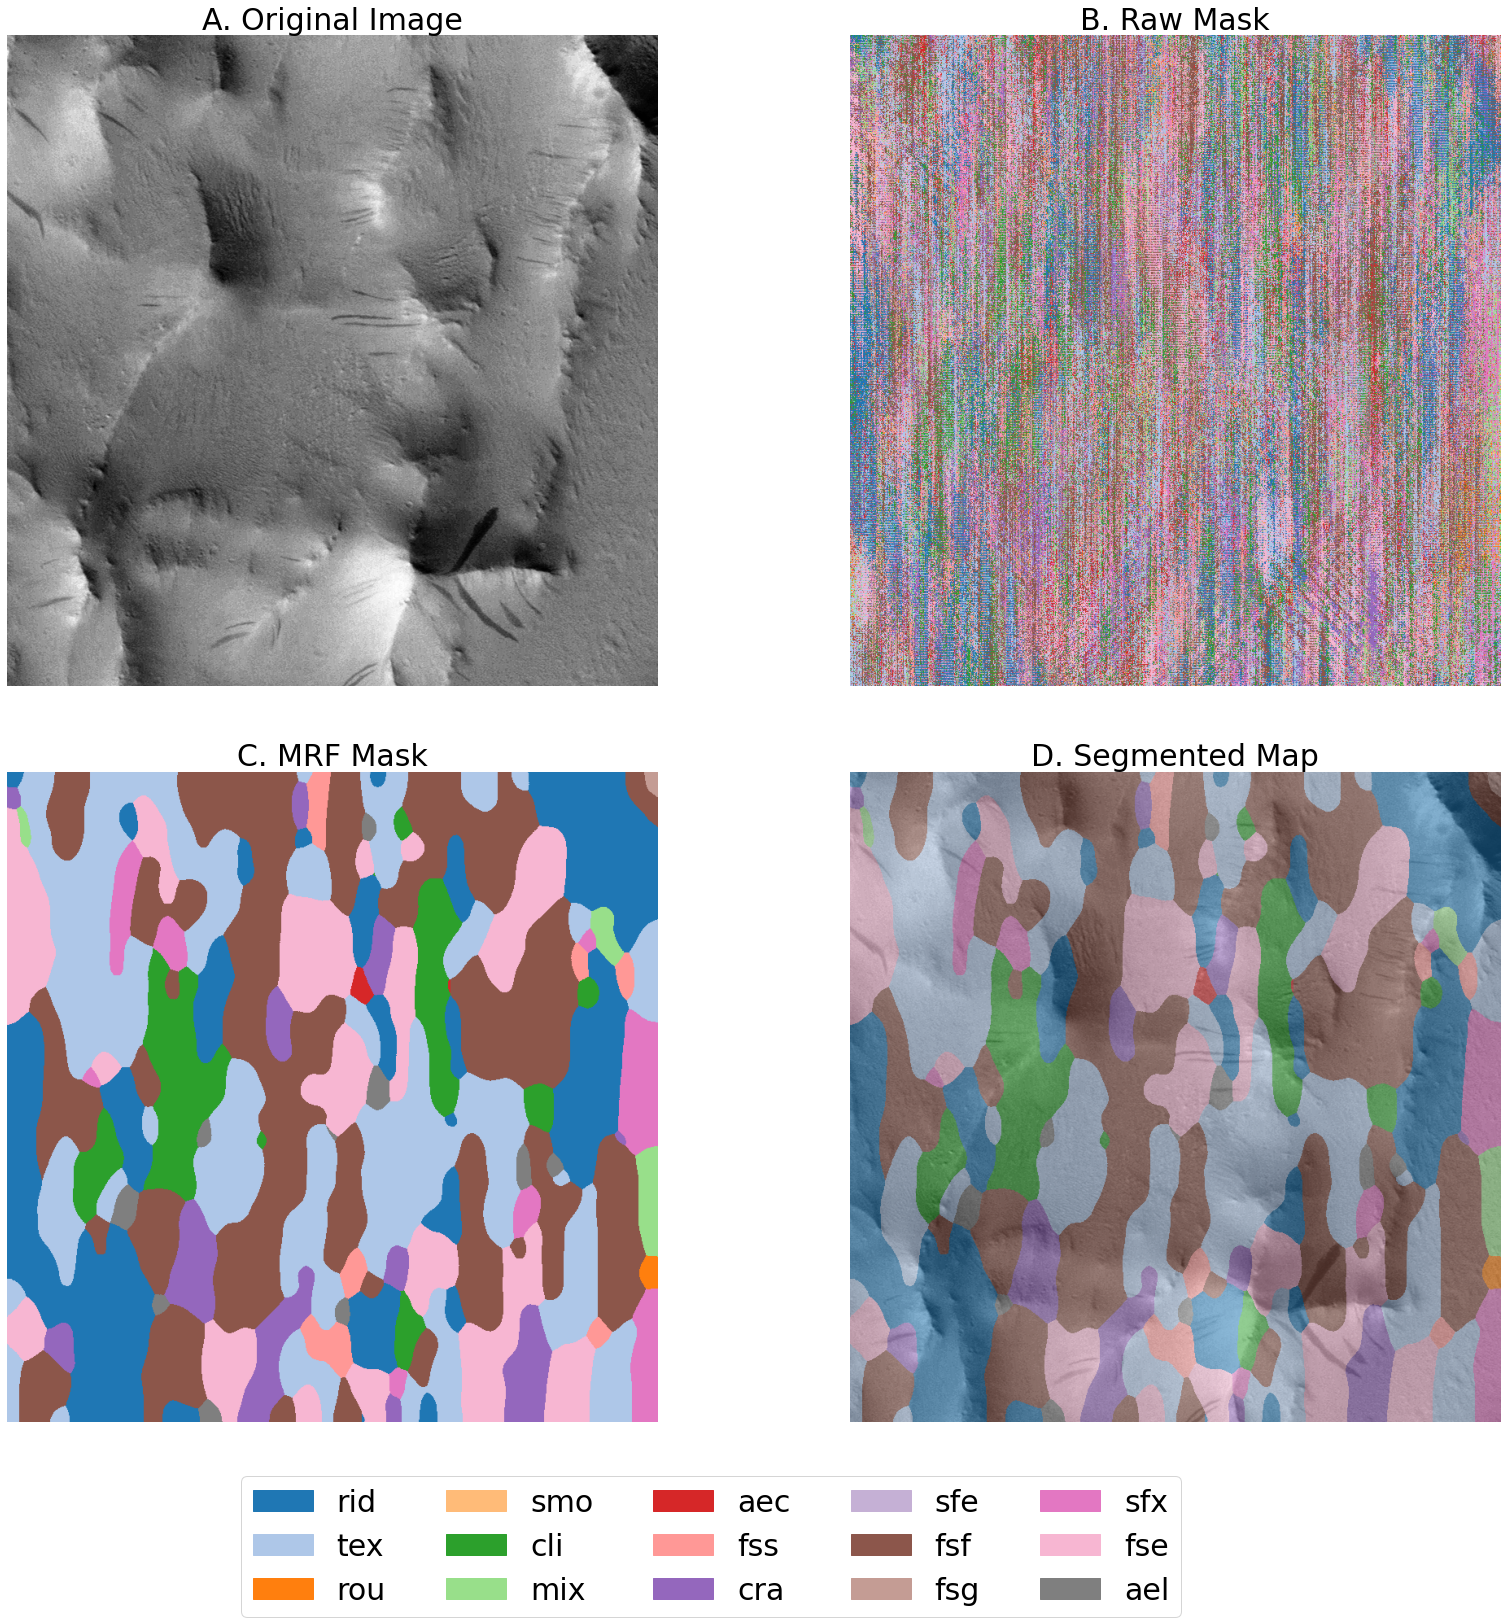

In [60]:
bg = Image.open('../results/G14_023651_2056_XI_25N148W_img.png').convert('RGB')
salt_pep = Image.open('../results/G14_023651_2056_XI_25N148W_map.png').convert('RGB')
mask = Image.open('../results/G14_023651_2056_XI_25N148W_mrf.png').convert('RGBA')
figure, axis = plt.subplots(2, 2)
figure.tight_layout()
font_config = {'fontsize':30}

# Normal
axis[0, 0].imshow(np.asarray(bg))
axis[0, 0].set_title("A. Original Image", fontdict=font_config)
axis[0, 0].axis('off')

# Normal
axis[0, 1].imshow(np.asarray(salt_pep))
axis[0, 1].set_title("B. Raw Mask", fontdict=font_config)
axis[0, 1].axis('off')

# Produced Mask
axis[1, 0].imshow(np.asarray(mask))
axis[1, 0].set_title("C. MRF Mask", fontdict=font_config)
axis[1, 0].axis('off')
mask.putalpha(130)
bg.paste(mask, mask=mask)

# Application of mask
axis[1, 1].imshow(np.asarray(bg))
axis[1, 1].set_title("D. Segmented Map", fontdict=font_config)
axis[1, 1].axis('off')

n = range(0, 15)
colors = plt.cm.tab20(n)
patches = [ mpatches.Patch(color=colors[i], label="{l}".format(l=labels[i])) for i in n]

figure.set_size_inches(24, 24)
figure.legend(handles=patches, ncol=5, loc="lower center", bbox_to_anchor=(.5,.0) , fontsize=30, title_fontsize=20)
figure.subplots_adjust(hspace=0.0)
figure.savefig("../results/G14_023651_2056_XI_25N148W_progression.png")

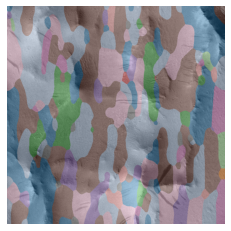

In [46]:
figure = plt.imshow(np.asarray(bg))
plt.axis('off')
plt.savefig("../results/mask.png")

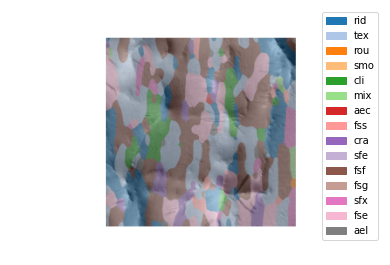

In [82]:
n = range(0, 15)
colors = plt.cm.tab20(n)
patches = [ mpatches.Patch(color=colors[i], label="{l}".format(l=labels[i])) for i in n]

image = plt.imread("../results/mask.png")
plt.imshow(image)
plt.legend(handles=patches, ncol=1)
plt.axis('off')
plt.tight_layout()
plt.savefig("../results/labeled_mask.png")
plt.show()


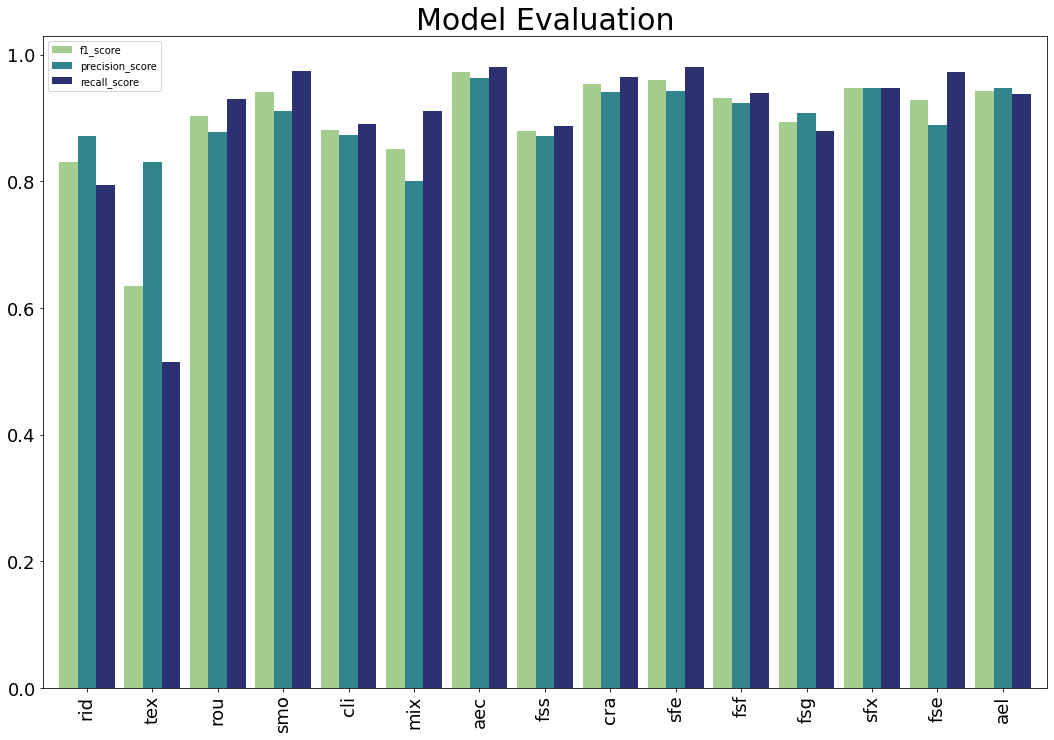

In [6]:
df = pd.DataFrame({'f1_score': test['f1_score'],
                      'precision_score': test['precision_score'],
                      'recall_score': test['recall_score']}, index=labels)
axs = df.plot.bar(figsize=(18, 12), 
                      fontsize=18, 
                      colormap=sns.color_palette("crest", as_cmap=True), 
                      width=.85)

axs.set_title("Model Evaluation", fontdict={'fontsize':30})
axs.figure.savefig("../results/metrics.png")


In [10]:
print(sum(test['f1_score'])/len(test['f1_score']))
print(sum(test['precision_score'])/len(test['precision_score']))
print(sum(test['recall_score'])/len(test['recall_score']))

0.8969686395837101
0.8998461662261796
0.9004013323972537
